# Imports

In [5]:
import pandas as pd
import json
from matplotlib import pyplot as plt
%matplotlib inline

# FUNCTIONS

In [6]:
def get_heartrate(value):
    """
    Function used with .apply on the value series to extract the resting heart rate.
    """
    dict = json.loads(value) 
    try:
        rhr = dict['restingHeartRate']
        return rhr
    except:
        return None


# CODE

## Read in csv file containing heart rate data.

In [7]:
df = pd.read_csv("resting_heartrate.csv")
df

,Unnamed: 0,activities-heart
0,0,"{'dateTime': '2020-12-29', 'value': {'customHe..."
1,1,"{'dateTime': '2020-12-30', 'value': {'customHe..."
2,2,"{'dateTime': '2020-12-31', 'value': {'customHe..."
3,3,"{'dateTime': '2021-01-01', 'value': {'customHe..."
4,4,"{'dateTime': '2021-01-02', 'value': {'customHe..."
5,5,"{'dateTime': '2021-01-03', 'value': {'customHe..."
6,6,"{'dateTime': '2021-01-04', 'value': {'customHe..."


## Convert to JSON

In [8]:
df['value'] = df['value'].str.replace("'",'"')
df['value']

KeyError: 'value'

## Build x/y dataframe where index is datetime and column is resting heartrate.

In [6]:
df['rhr'] = df['value'].apply(get_heartrate)
df = df.drop(['value'],axis=1)
df['dateTime'] = pd.to_datetime(df['dateTime'])
df.set_index(['dateTime'],inplace=True)
df

KeyError: 'value'

## Plot resting heartrate
See Youtube video: https://www.youtube.com/watch?v=G5TrCBgox1A

<AxesSubplot:>

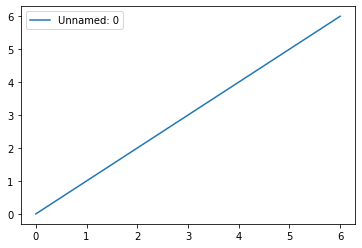

In [5]:
df.plot()